<a href="https://colab.research.google.com/github/TheAnujSaini/TheAnujSaini/blob/main/credit_score_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


In [ ]:
df=pd.read_csv('/content/lending_club_loan_two.csv.zip')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
df['loan_status'].value_counts()


,count
loan_status,
1,318357
0,77673


In [ ]:
df = df.drop(columns=['emp_title', 'address', 'title'])
df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0


In [ ]:
df = df.drop(columns=['mort_acc'])  # Drop column with many missing values
df = df.dropna()  # Drop rows with missing values


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,...,earliest_cr_line_Sep-2007,earliest_cr_line_Sep-2008,earliest_cr_line_Sep-2009,earliest_cr_line_Sep-2010,earliest_cr_line_Sep-2011,earliest_cr_line_Sep-2012,earliest_cr_line_Sep-2013,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,41.8,...,False,False,False,False,False,False,False,True,True,False
1,8000.0,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,53.3,...,False,False,False,False,False,False,False,False,True,False
2,15600.0,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.0,92.2,...,False,False,False,False,False,False,False,False,True,False
3,7200.0,6.49,220.65,54000.0,1,2.60,6.0,0.0,5472.0,21.5,...,False,False,False,False,False,False,False,False,True,False
4,24375.0,17.27,609.33,55000.0,0,33.95,13.0,0.0,24584.0,69.8,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()


,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,...,earliest_cr_line_Sep-2007,earliest_cr_line_Sep-2008,earliest_cr_line_Sep-2009,earliest_cr_line_Sep-2010,earliest_cr_line_Sep-2011,earliest_cr_line_Sep-2012,earliest_cr_line_Sep-2013,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT
0,-0.509242,-0.491091,-0.423552,0.668419,1,1.102507,16.0,0.0,0.985765,-0.498019,...,False,False,False,False,False,False,False,True,True,False
1,-0.748063,-0.368190,-0.677538,-0.167053,1,0.585973,17.0,0.0,0.200706,-0.027093,...,False,False,False,False,False,False,False,False,True,False
2,0.159458,-0.703373,0.283029,-0.519607,1,-0.555580,13.0,0.0,-0.193032,1.565864,...,False,False,False,False,False,False,False,False,True,False
3,-0.843592,-1.597193,-0.856800,-0.343788,1,-1.811782,6.0,0.0,-0.508013,-1.329305,...,False,False,False,False,False,False,False,False,True,False
4,1.207286,0.811652,0.690520,-0.327721,0,2.052979,13.0,0.0,0.415995,0.648583,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)  # Features
y = df['loan_status']  # Target



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.06      0.12     14417
           1       0.82      0.99      0.89     60969

    accuracy                           0.81     75386
   macro avg       0.68      0.53      0.50     75386
weighted avg       0.76      0.81      0.75     75386

ROC-AUC Score: 0.7100339937513719


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



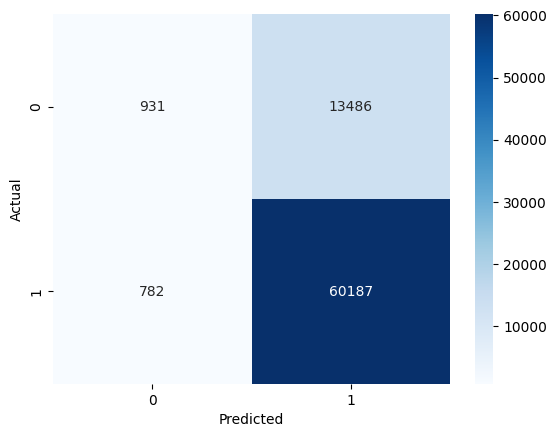

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

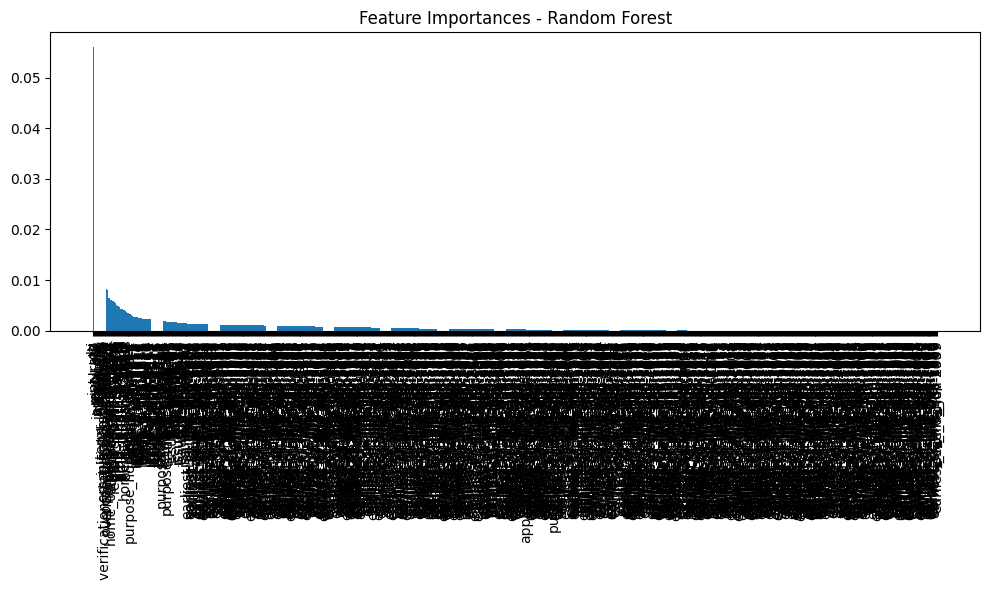

In [ ]:
# Random Forest feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(rf_model, 'credit_scoring_model.pkl')

# To load the model later
# rf_model = joblib.load('credit_scoring_model.pkl')


['credit_scoring_model.pkl']

In [ ]:
new_applicant = pd.DataFrame({
    'loan_amnt': [5000],
    'term': [' 36 months'],
    'int_rate': [10.65],
    'installment': [162.87],
    'grade': ['B'],
    'sub_grade': ['B2'],
    'emp_length': ['10+ years'],
    'home_ownership': ['RENT'],
    'annual_inc': [24000],
    'verification_status': ['Verified'],
    'purpose': ['credit_card'],
    'dti': [27.65],
    'open_acc': [3],
    'revol_bal': [13648],
    'revol_util': [83.7],
    'pub_rec_bankruptcies': [0]
})


In [ ]:
new_applicant = pd.get_dummies(new_applicant, drop_first=True)

# Align the new data with the training data columns (some features may be missing after one-hot encoding)
new_applicant = new_applicant.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
new_applicant[numeric_columns] = scaler.transform(new_applicant[numeric_columns])


In [ ]:
# Use the trained model to predict
credit_score = rf_model.predict(new_applicant)

# If you want the probability of repayment:
credit_score_prob = rf_model.predict_proba(new_applicant)[:, 1]  # Probability of "Fully Paid"

print(f"Predicted Creditworthiness (0 = Charged Off, 1 = Fully Paid): {credit_score[0]}")
print(f"Probability of Fully Paid: {credit_score_prob[0]}")


Predicted Creditworthiness (0 = Charged Off, 1 = Fully Paid): 1
Probability of Fully Paid: 0.87
